<a href="https://colab.research.google.com/github/imamsyahrizal/coding-test-iot/blob/main/Task1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Conversion



*   Fetch data from http://jsonplaceholder.typicode.com/users
*   Join the fetched data with the salary data from the JSON file by using the id
*   Add one field to represent salary in USD (salary in the JSON file is in IDR) using currency converter (such as https://free.currencyconverterapi.com)    Please be efficient with the
resources by not using a GET request at the endpoint after every conversion
* The Outputs from the endpoint should be: id, name, username, email, address, phone, salary in IDR, and salary in USD



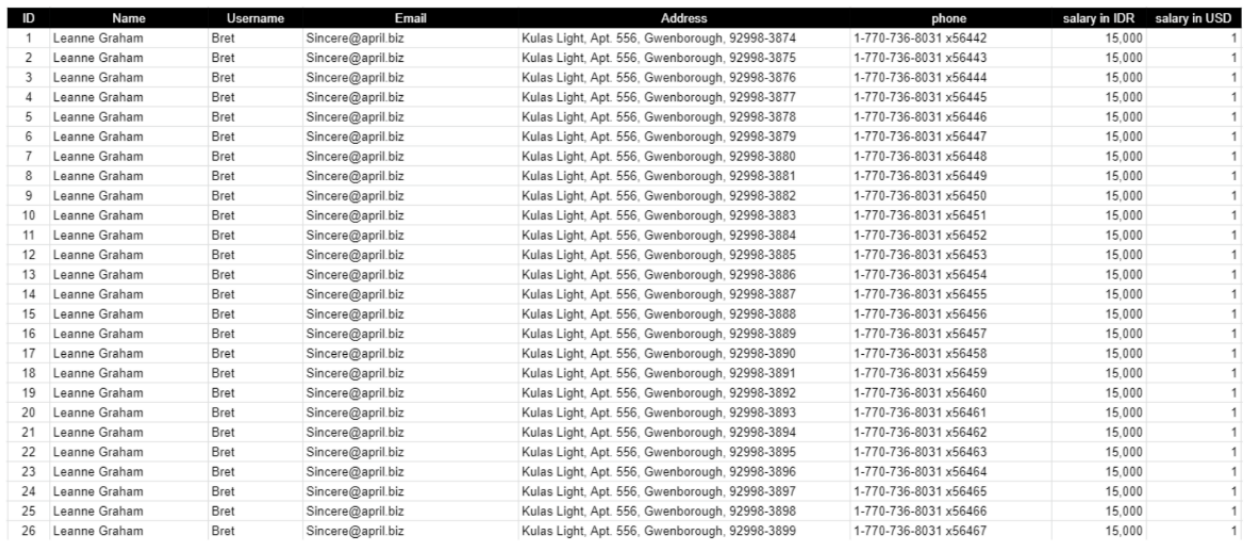

## Import Data

### User Data

In [ ]:
import pandas as pd

In [ ]:
url = 'http://jsonplaceholder.typicode.com/users'
dataUser = pd.read_json(url)
dataUser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10 non-null     int64 
 1   name      10 non-null     object
 2   username  10 non-null     object
 3   email     10 non-null     object
 4   address   10 non-null     object
 5   phone     10 non-null     object
 6   website   10 non-null     object
 7   company   10 non-null     object
dtypes: int64(1), object(7)
memory usage: 768.0+ bytes


In [ ]:
dataUser

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."
5,6,Mrs. Dennis Schulist,Leopoldo_Corkery,Karley_Dach@jasper.info,"{'street': 'Norberto Crossing', 'suite': 'Apt....",1-477-935-8478 x6430,ola.org,"{'name': 'Considine-Lockman', 'catchPhrase': '..."
6,7,Kurtis Weissnat,Elwyn.Skiles,Telly.Hoeger@billy.biz,"{'street': 'Rex Trail', 'suite': 'Suite 280', ...",210.067.6132,elvis.io,"{'name': 'Johns Group', 'catchPhrase': 'Config..."
7,8,Nicholas Runolfsdottir V,Maxime_Nienow,Sherwood@rosamond.me,"{'street': 'Ellsworth Summit', 'suite': 'Suite...",586.493.6943 x140,jacynthe.com,"{'name': 'Abernathy Group', 'catchPhrase': 'Im..."
8,9,Glenna Reichert,Delphine,Chaim_McDermott@dana.io,"{'street': 'Dayna Park', 'suite': 'Suite 449',...",(775)976-6794 x41206,conrad.com,"{'name': 'Yost and Sons', 'catchPhrase': 'Swit..."
9,10,Clementina DuBuque,Moriah.Stanton,Rey.Padberg@karina.biz,"{'street': 'Kattie Turnpike', 'suite': 'Suite ...",024-648-3804,ambrose.net,"{'name': 'Hoeger LLC', 'catchPhrase': 'Central..."


### Salary Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/Tes CAD-IT/salary_data.json' '/content/'

In [ ]:
fileName = '/content/salary_data.json'
dataSalary = pd.read_json(fileName)
dataSalary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   array   10 non-null     object
dtypes: object(1)
memory usage: 208.0+ bytes


In [ ]:
dataSalary

,array
0,"{'salaryInIDR': 4001111.510555328, 'id': 1}"
1,"{'salaryInIDR': 4685534.363816402, 'id': 2}"
2,"{'salaryInIDR': 3013601.6163306856, 'id': 3}"
3,"{'salaryInIDR': 9619331.420029558, 'id': 4}"
4,"{'salaryInIDR': 8380696.500881106, 'id': 5}"
5,"{'salaryInIDR': 9091824.554498984, 'id': 6}"
6,"{'salaryInIDR': 6996573.171622309, 'id': 7}"
7,"{'salaryInIDR': 3910254.9300046633, 'id': 8}"
8,"{'salaryInIDR': 5968429.287836904, 'id': 9}"
9,"{'salaryInIDR': 5964808.282007527, 'id': 10}"


## Converter for Currency

### Get Value exchange

In [ ]:
import requests

In [ ]:
url = 'https://api.frankfurter.app/'
date = 'latest'
current_currency = 'IDR'
target_currency = 'USD'
amount = float(1) 

In [ ]:
command = '{}{}?amount={}&from={}&to={}'.format(url, date, amount, current_currency, target_currency)

In [ ]:
try:
  response = requests.get(command)
  nilai = response.json()['rates'][target_currency]
  print(nilai)
except ValueError:
  print('failed')

6.5e-05


In [ ]:
response.json()

{'amount': 1.0, 'base': 'IDR', 'date': '2022-12-30', 'rates': {'USD': 6.5e-05}}

### Edit Salary Data

In [ ]:
dataSalary

,array
0,"{'salaryInIDR': 4001111.510555328, 'id': 1}"
1,"{'salaryInIDR': 4685534.363816402, 'id': 2}"
2,"{'salaryInIDR': 3013601.6163306856, 'id': 3}"
3,"{'salaryInIDR': 9619331.420029558, 'id': 4}"
4,"{'salaryInIDR': 8380696.500881106, 'id': 5}"
5,"{'salaryInIDR': 9091824.554498984, 'id': 6}"
6,"{'salaryInIDR': 6996573.171622309, 'id': 7}"
7,"{'salaryInIDR': 3910254.9300046633, 'id': 8}"
8,"{'salaryInIDR': 5968429.287836904, 'id': 9}"
9,"{'salaryInIDR': 5964808.282007527, 'id': 10}"


In [ ]:
id = []
salaryIDR = []
salaryUSD = []
for i in dataSalary['array']:
  id.append(i['id'])
  salaryIDR.append("%.2f" % i['salaryInIDR'])
  convert=i['salaryInIDR']*nilai
  salaryUSD.append("%.2f" % convert)

In [ ]:
dataSalaryNew = pd.DataFrame({'id':id, 'SalaryIDR':salaryIDR, 'SalaryUSD':salaryUSD})
dataSalaryNew

,id,SalaryIDR,SalaryUSD
0,1,4001111.51,260.07
1,2,4685534.36,304.56
2,3,3013601.62,195.88
3,4,9619331.42,625.26
4,5,8380696.50,544.75
5,6,9091824.55,590.97
6,7,6996573.17,454.78
7,8,3910254.93,254.17
8,9,5968429.29,387.95
9,10,5964808.28,387.71


## Edit User Data

In [ ]:
dataUser.head(2)

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."


#### Address

In [ ]:
dataUser['address']

0    {'street': 'Kulas Light', 'suite': 'Apt. 556',...
1    {'street': 'Victor Plains', 'suite': 'Suite 87...
2    {'street': 'Douglas Extension', 'suite': 'Suit...
3    {'street': 'Hoeger Mall', 'suite': 'Apt. 692',...
4    {'street': 'Skiles Walks', 'suite': 'Suite 351...
5    {'street': 'Norberto Crossing', 'suite': 'Apt....
6    {'street': 'Rex Trail', 'suite': 'Suite 280', ...
7    {'street': 'Ellsworth Summit', 'suite': 'Suite...
8    {'street': 'Dayna Park', 'suite': 'Suite 449',...
9    {'street': 'Kattie Turnpike', 'suite': 'Suite ...
Name: address, dtype: object

In [ ]:
dataUser['address'][0].keys()

dict_keys(['street', 'suite', 'city', 'zipcode', 'geo'])

In [ ]:
userAddress= []
for address in dataUser['address']: 
  alamat = '{}, {} {}, {}'.format(address['street'], address['suite'], address['city'], address['zipcode'])
  userAddress.append(alamat)

In [ ]:
userAddress

['Kulas Light, Apt. 556 Gwenborough, 92998-3874',
 'Victor Plains, Suite 879 Wisokyburgh, 90566-7771',
 'Douglas Extension, Suite 847 McKenziehaven, 59590-4157',
 'Hoeger Mall, Apt. 692 South Elvis, 53919-4257',
 'Skiles Walks, Suite 351 Roscoeview, 33263',
 'Norberto Crossing, Apt. 950 South Christy, 23505-1337',
 'Rex Trail, Suite 280 Howemouth, 58804-1099',
 'Ellsworth Summit, Suite 729 Aliyaview, 45169',
 'Dayna Park, Suite 449 Bartholomebury, 76495-3109',
 'Kattie Turnpike, Suite 198 Lebsackbury, 31428-2261']

In [ ]:
dataUser['address'] = userAddress
dataUser.head(2)

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"Kulas Light, Apt. 556 Gwenborough, 92998-3874",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"Victor Plains, Suite 879 Wisokyburgh, 90566-7771",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."


#### Phone

In [ ]:
dataUser['phone']

0    1-770-736-8031 x56442
1      010-692-6593 x09125
2           1-463-123-4447
3        493-170-9623 x156
4            (254)954-1289
5     1-477-935-8478 x6430
6             210.067.6132
7        586.493.6943 x140
8     (775)976-6794 x41206
9             024-648-3804
Name: phone, dtype: object

In [ ]:
!pip install phonenumbers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 3.8 MB/s 


In [ ]:
import phonenumbers as pn

In [ ]:
newNumber=[]
for i in dataUser['phone']:
  if(i.startswith('0')):
    i=i[1:]
  new_phone = pn.format_number(pn.parse(i, 'US'), pn.PhoneNumberFormat.NATIONAL)
  newNumber.append(new_phone)
newNumber

['(770) 736-8031 ext. 56442',
 '106926593 ext. 09125',
 '(463) 123-4447',
 '(493) 170-9623 ext. 156',
 '(254) 954-1289',
 '(477) 935-8478 ext. 6430',
 '(210) 067-6132',
 '(586) 493-6943 ext. 140',
 '(775) 976-6794 ext. 41206',
 '246483804']

In [ ]:
dataUser['phone'] = newNumber

## Final Data

In [ ]:
dataUserNew = dataUser[['id', 'name', 'username', 'email', 'address', 'phone']]
dataUserNew.head(2)

,id,name,username,email,address,phone
0,1,Leanne Graham,Bret,Sincere@april.biz,"Kulas Light, Apt. 556 Gwenborough, 92998-3874",(770) 736-8031 ext. 56442
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"Victor Plains, Suite 879 Wisokyburgh, 90566-7771",106926593 ext. 09125


In [ ]:
finalDataFrame = pd.merge(dataUserNew, dataSalaryNew, on ='id')
finalDataFrame.head(2)

,id,name,username,email,address,phone,SalaryIDR,SalaryUSD
0,1,Leanne Graham,Bret,Sincere@april.biz,"Kulas Light, Apt. 556 Gwenborough, 92998-3874",(770) 736-8031 ext. 56442,4001111.51,260.07
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"Victor Plains, Suite 879 Wisokyburgh, 90566-7771",106926593 ext. 09125,4685534.36,304.56


In [ ]:
finalDataFrame = finalDataFrame.rename(columns={'id':'ID', 'name':'Name', 'username':'Username', 'email':'Email', 'address':'Address', 'SalaryIDR':'salary in IDR', 'SalaryUSD':'salary in USD'})

In [ ]:
display(finalDataFrame)

,ID,Name,Username,Email,Address,phone,salary in IDR,salary in USD
0,1,Leanne Graham,Bret,Sincere@april.biz,"Kulas Light, Apt. 556 Gwenborough, 92998-3874",(770) 736-8031 ext. 56442,4001111.51,260.07
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"Victor Plains, Suite 879 Wisokyburgh, 90566-7771",106926593 ext. 09125,4685534.36,304.56
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"Douglas Extension, Suite 847 McKenziehaven, 59...",(463) 123-4447,3013601.62,195.88
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"Hoeger Mall, Apt. 692 South Elvis, 53919-4257",(493) 170-9623 ext. 156,9619331.42,625.26
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"Skiles Walks, Suite 351 Roscoeview, 33263",(254) 954-1289,8380696.50,544.75
5,6,Mrs. Dennis Schulist,Leopoldo_Corkery,Karley_Dach@jasper.info,"Norberto Crossing, Apt. 950 South Christy, 235...",(477) 935-8478 ext. 6430,9091824.55,590.97
6,7,Kurtis Weissnat,Elwyn.Skiles,Telly.Hoeger@billy.biz,"Rex Trail, Suite 280 Howemouth, 58804-1099",(210) 067-6132,6996573.17,454.78
7,8,Nicholas Runolfsdottir V,Maxime_Nienow,Sherwood@rosamond.me,"Ellsworth Summit, Suite 729 Aliyaview, 45169",(586) 493-6943 ext. 140,3910254.93,254.17
8,9,Glenna Reichert,Delphine,Chaim_McDermott@dana.io,"Dayna Park, Suite 449 Bartholomebury, 76495-3109",(775) 976-6794 ext. 41206,5968429.29,387.95
9,10,Clementina DuBuque,Moriah.Stanton,Rey.Padberg@karina.biz,"Kattie Turnpike, Suite 198 Lebsackbury, 31428-...",246483804,5964808.28,387.71
